In [1]:
import numpy
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn-talk')
import seaborn as sns

In [2]:
plt.style.use('grayscale')

In [3]:
# load R %magic
import rpy2
%load_ext rpy2.ipython

In [4]:
data=pd.read_csv("resultados_nov3.csv", sep=";", decimal=".")
data.sample(15)

,item_code,n,mean,sd,median,trimmed,range,skew,kurtosis,se,...,infitZ,KNN,RBF_SVM,Rand_Forest,AdaBoost,Naive_Bayes,QDA,judge_agree,process,n_jueces
128,VB_22c,40,0.175000,0.384808,0.0,0.093750,1,2.000000,0.732541,0.060843,...,-0.529800,0.300000,0.642857,0.642857,1.000000,0.642857,0.500000,0.000000,0,1
61,ME_7b,40,0.750000,0.438529,1.0,0.812500,1,-1.000000,-0.781875,0.069338,...,-0.579443,1.000000,1.000000,0.000000,0.666667,1.000000,1.000000,0.000000,0,1
124,VB_12d,41,0.658537,0.480091,1.0,0.696970,1,-0.644335,-2.000000,0.074978,...,-0.205310,0.333333,0.733333,0.733333,0.333333,0.333333,0.733333,1.000000,transfer,3
49,ME_5b,40,0.350000,0.483046,0.0,0.312500,1,0.605533,-2.000000,0.076376,...,-0.810446,0.766667,0.642857,0.642857,0.766667,0.766667,0.500000,1.000000,transfer,3
125,VB_15a,40,0.575000,0.500641,1.0,0.593750,1,-0.292126,-2.000000,0.079158,...,-0.974374,0.000000,0.400000,1.000000,0.666667,0.400000,0.400000,1.000000,transfer,3
0,EM_16b,40,0.400000,0.496139,0.0,0.375000,1,0.393035,-2.000000,0.078446,...,-0.699206,0.500000,0.200000,0.333333,0.333333,0.333333,0.500000,1.000000,transfer,2
57,ME_73,43,0.651163,0.482243,1.0,0.685714,1,-0.612336,-2.000000,0.073541,...,0.074678,1.000000,0.857143,0.000000,0.666667,0.857143,0.666667,0.750000,transfer,4
75,MX_16a,38,0.078947,0.273276,0.0,0.000000,1,3.000000,7.000000,0.044331,...,-0.128624,1.000000,1.000000,1.000000,1.000000,1.000000,0.666667,1.000000,transfer,2
91,PS_26p,40,0.625000,0.490290,1.0,0.656250,1,-0.497154,-2.000000,0.077522,...,-0.783555,0.733333,1.000000,0.333333,1.000000,0.733333,0.733333,0.000000,0,1
99,PS_51b,39,0.589744,0.498310,1.0,0.606061,1,-0.350956,-2.000000,0.079793,...,1.000000,1.000000,1.000000,1.000000,1.000000,0.333333,0.333333,1.000000,transfer,2


In [5]:
pd.crosstab(data.process, columns="count")

col_0,count
process,
0,29
retention,10
transfer,95


In [6]:
dat_2=data.loc[(data.process=="transfer")|(data.process=="retention"),["item_code","IRT_difficulty","KNN","RBF_SVM","Rand_Forest","AdaBoost","Naive_Bayes","QDA","process"]]
dat_2.set_index("item_code", inplace=True)
dat_2.sample(15)

,IRT_difficulty,KNN,RBF_SVM,Rand_Forest,AdaBoost,Naive_Bayes,QDA,process
item_code,,,,,,,,
II_24b,0.730888,0.766667,0.642857,0.642857,0.642857,0.500000,0.500000,transfer
VB_5a,-0.100083,0.300000,0.642857,0.642857,0.300000,0.300000,0.300000,transfer
PS_46b,-1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.666667,transfer
ME_10,0.485508,1.000000,0.500000,0.100000,0.000000,0.000000,0.000000,transfer
MS_39,0.302281,0.000000,0.666667,1.000000,0.666667,0.000000,0.000000,transfer
II_26,1.000000,0.733333,0.333333,0.333333,0.200000,0.200000,0.333333,transfer
ME_69b,2.000000,1.000000,0.333333,0.333333,0.733333,0.333333,0.333333,transfer
ST_31b,1.000000,1.000000,0.642857,0.642857,0.642857,0.500000,0.642857,retention
MS_30b,-1.000000,0.642857,1.000000,0.642857,0.642857,0.500000,0.300000,transfer


Text(0.5, 1.0, 'IRT difficulty')

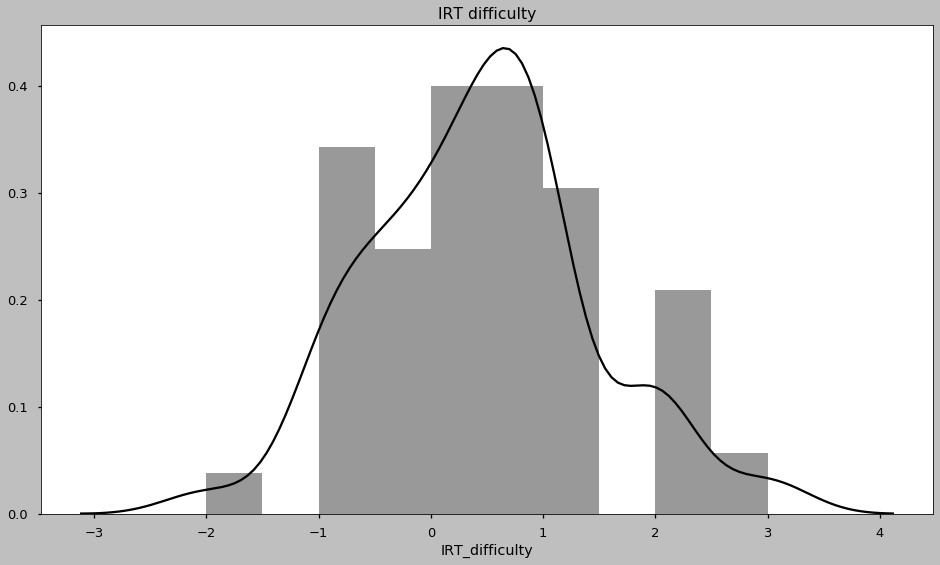

In [7]:
plt.figure(figsize=(16,9))
sns.distplot(dat_2.IRT_difficulty, label="general")
plt.title("IRT difficulty")
# plt.legend()

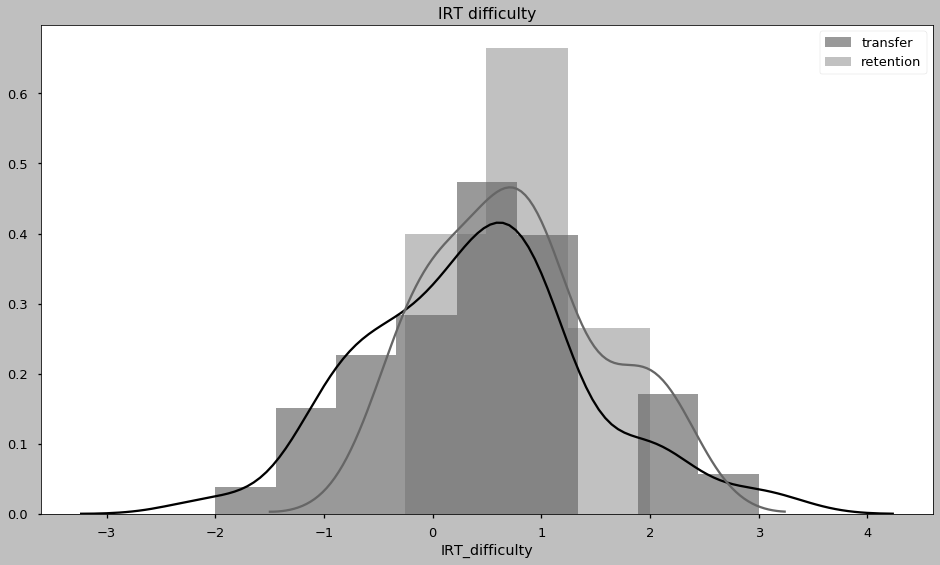

In [8]:
plt.figure(figsize=(16,9))
sns.distplot(dat_2.IRT_difficulty[dat_2.process=="transfer"], label="transfer")
sns.distplot(dat_2.IRT_difficulty[dat_2.process=="retention"], label="retention")
# sns.distplot(dat_2.IRT_difficulty, label="general")
plt.title("IRT difficulty")
plt.legend()

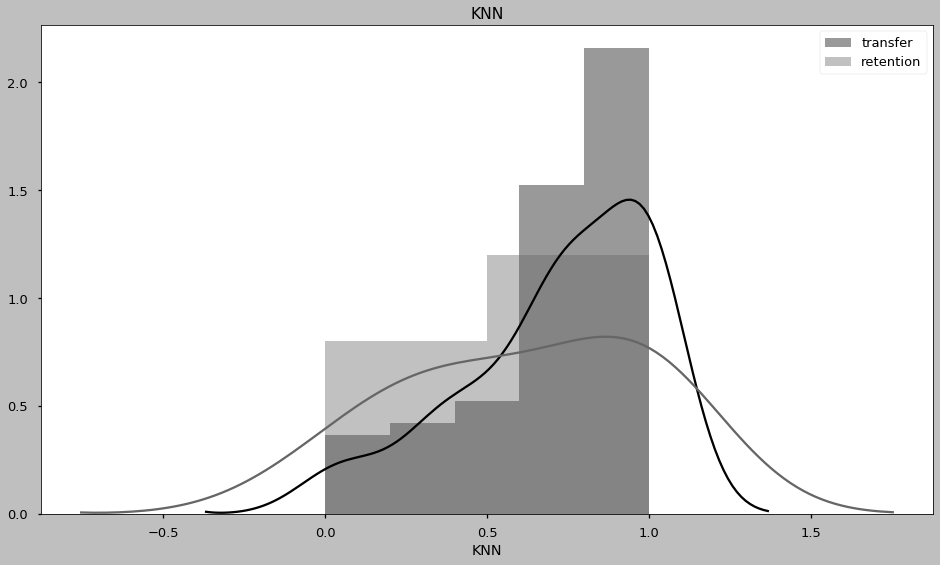

In [9]:
plt.figure(figsize=(16,9))
sns.distplot(dat_2.KNN[dat_2.process=="transfer"], label="transfer")
sns.distplot(dat_2.KNN[dat_2.process=="retention"], label="retention")
# sns.distplot(dat_2.IRT_difficulty, label="general")
plt.title("KNN")
plt.legend()

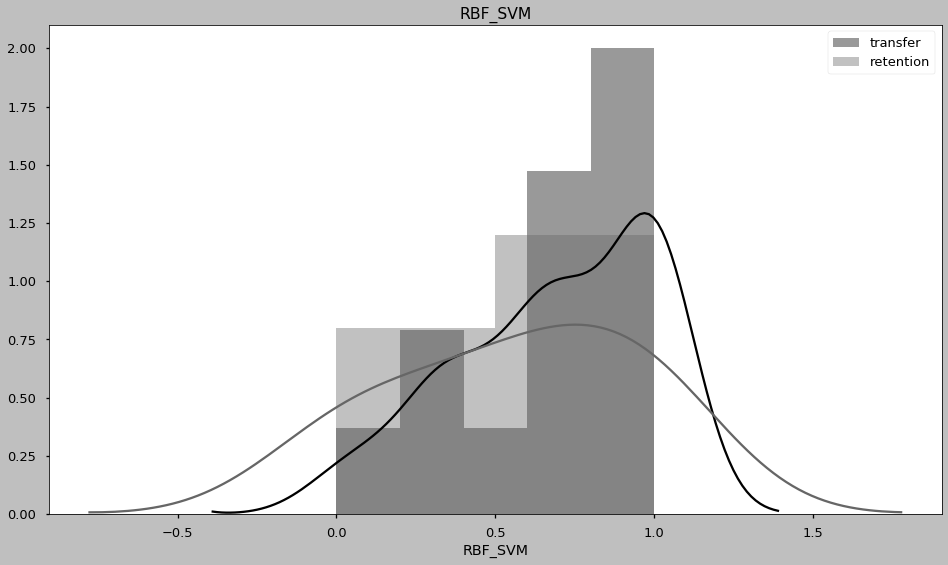

In [10]:
plt.figure(figsize=(16,9))
sns.distplot(dat_2.RBF_SVM[dat_2.process=="transfer"], label="transfer")
sns.distplot(dat_2.RBF_SVM[dat_2.process=="retention"], label="retention")
# sns.distplot(dat_2.IRT_difficulty, label="general")
plt.title("RBF_SVM")
plt.legend()

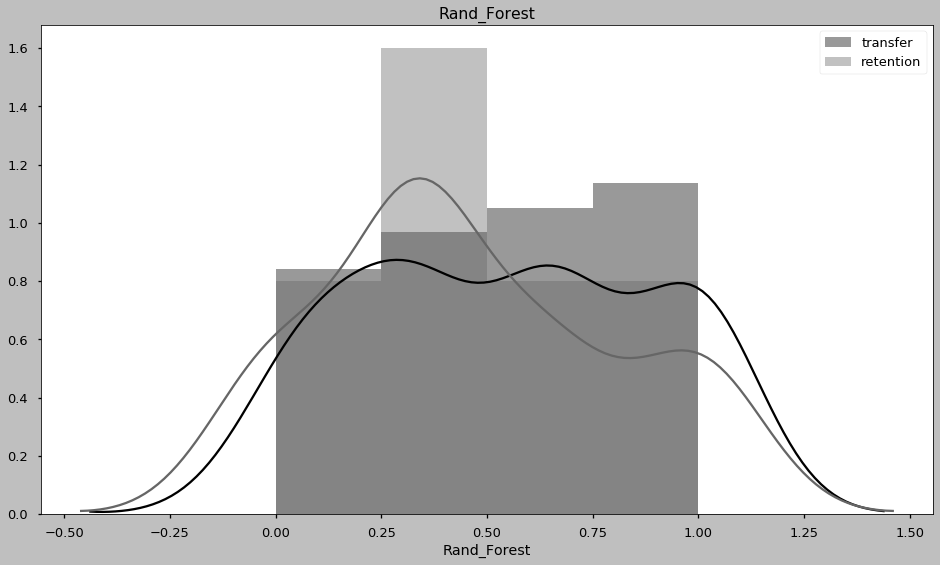

In [11]:
plt.figure(figsize=(16,9))
sns.distplot(dat_2.Rand_Forest[dat_2.process=="transfer"], label="transfer")
sns.distplot(dat_2.Rand_Forest[dat_2.process=="retention"], label="retention")
# sns.distplot(dat_2.IRT_difficulty, label="general")
plt.title("Rand_Forest")
plt.legend()

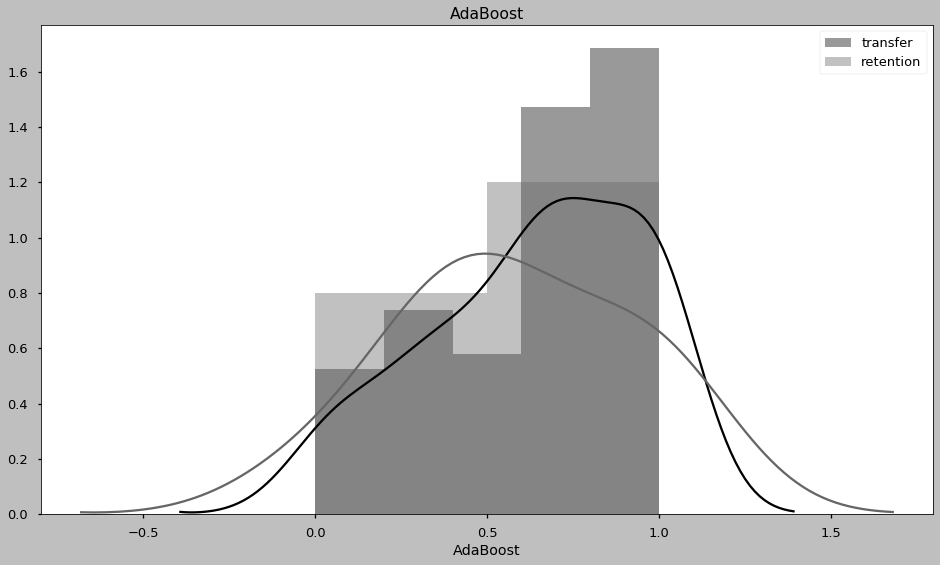

In [12]:
plt.figure(figsize=(16,9))
sns.distplot(dat_2.AdaBoost[dat_2.process=="transfer"], label="transfer")
sns.distplot(dat_2.AdaBoost[dat_2.process=="retention"], label="retention")
# sns.distplot(dat_2.IRT_difficulty, label="general")
plt.title("AdaBoost")
plt.legend()

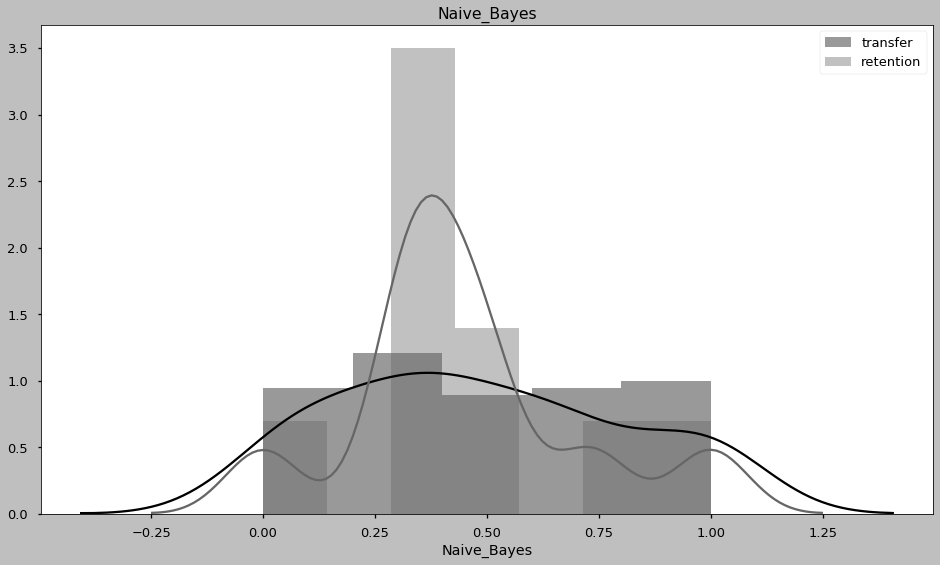

In [13]:
plt.figure(figsize=(16,9))
sns.distplot(dat_2.Naive_Bayes[dat_2.process=="transfer"], label="transfer")
sns.distplot(dat_2.Naive_Bayes[dat_2.process=="retention"], label="retention")
# sns.distplot(dat_2.IRT_difficulty, label="general")
plt.title("Naive_Bayes")
plt.legend()

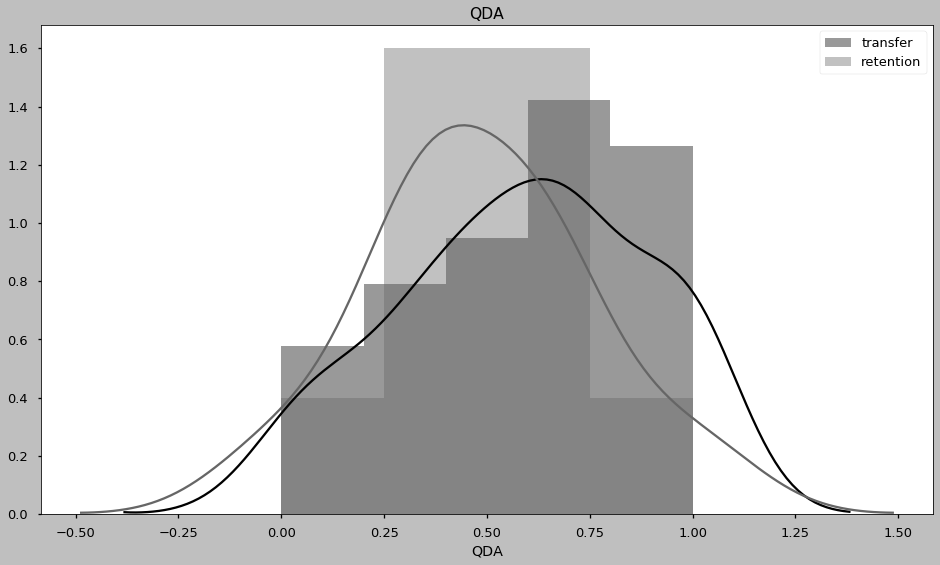

In [14]:
plt.figure(figsize=(16,9))
sns.distplot(dat_2.QDA[dat_2.process=="transfer"], label="transfer")
sns.distplot(dat_2.QDA[dat_2.process=="retention"], label="retention")
# sns.distplot(dat_2.IRT_difficulty, label="general")
plt.title("QDA")
plt.legend()


In [15]:
dat_heat=pd.concat([data.loc[(data.process=="transfer")|(data.process=="retention"),["IRT_difficulty","KNN","RBF_SVM","Rand_Forest","AdaBoost","Naive_Bayes","QDA"]],
                      pd.get_dummies(data.loc[(data.process=="transfer")|(data.process=="retention"),["process"]])], axis=1, sort=False)
dat_heat.index=data.loc[(data.process=="transfer")|(data.process=="retention"),["item_code"]]
dat_heat.sample(15)          

,IRT_difficulty,KNN,RBF_SVM,Rand_Forest,AdaBoost,Naive_Bayes,QDA,process_retention,process_transfer
"(MX_52b,)",1.000000,0.733333,0.733333,0.333333,0.733333,0.200000,0.333333,0,1
"(SE_22c,)",0.362905,0.733333,0.333333,0.333333,1.000000,0.333333,0.200000,0,1
"(ME_17c,)",-0.810930,1.000000,0.766667,0.766667,0.766667,0.642857,0.642857,0,1
"(ST_52a,)",0.405465,0.766667,0.100000,0.100000,0.766667,0.500000,0.500000,0,1
"(PS_2a,)",0.074108,1.000000,0.766667,0.100000,1.000000,0.642857,1.000000,0,1
"(ME_78b,)",3.000000,1.000000,1.000000,1.000000,1.000000,0.400000,0.400000,0,1
"(ME_6b,)",-1.000000,0.857143,0.666667,0.000000,0.857143,1.000000,0.857143,0,1
"(MS_43a,)",0.969401,1.000000,1.000000,1.000000,0.857143,0.666667,0.857143,0,1
"(MX_49,)",2.000000,0.733333,0.333333,0.333333,0.333333,0.333333,0.733333,0,1
"(ME_7a,)",0.773190,0.400000,0.000000,0.000000,0.000000,1.000000,1.000000,0,1


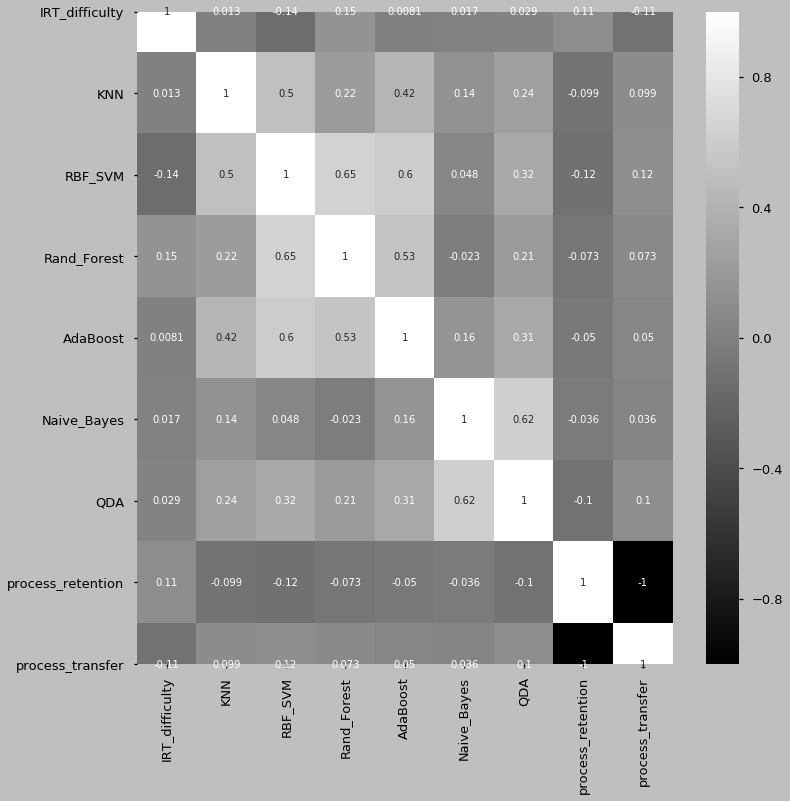

In [18]:
plt.figure(figsize=(12,12))
sns.heatmap(dat_heat.corr(), annot=True, vmin=-1, vmax=1,cmap="gray")

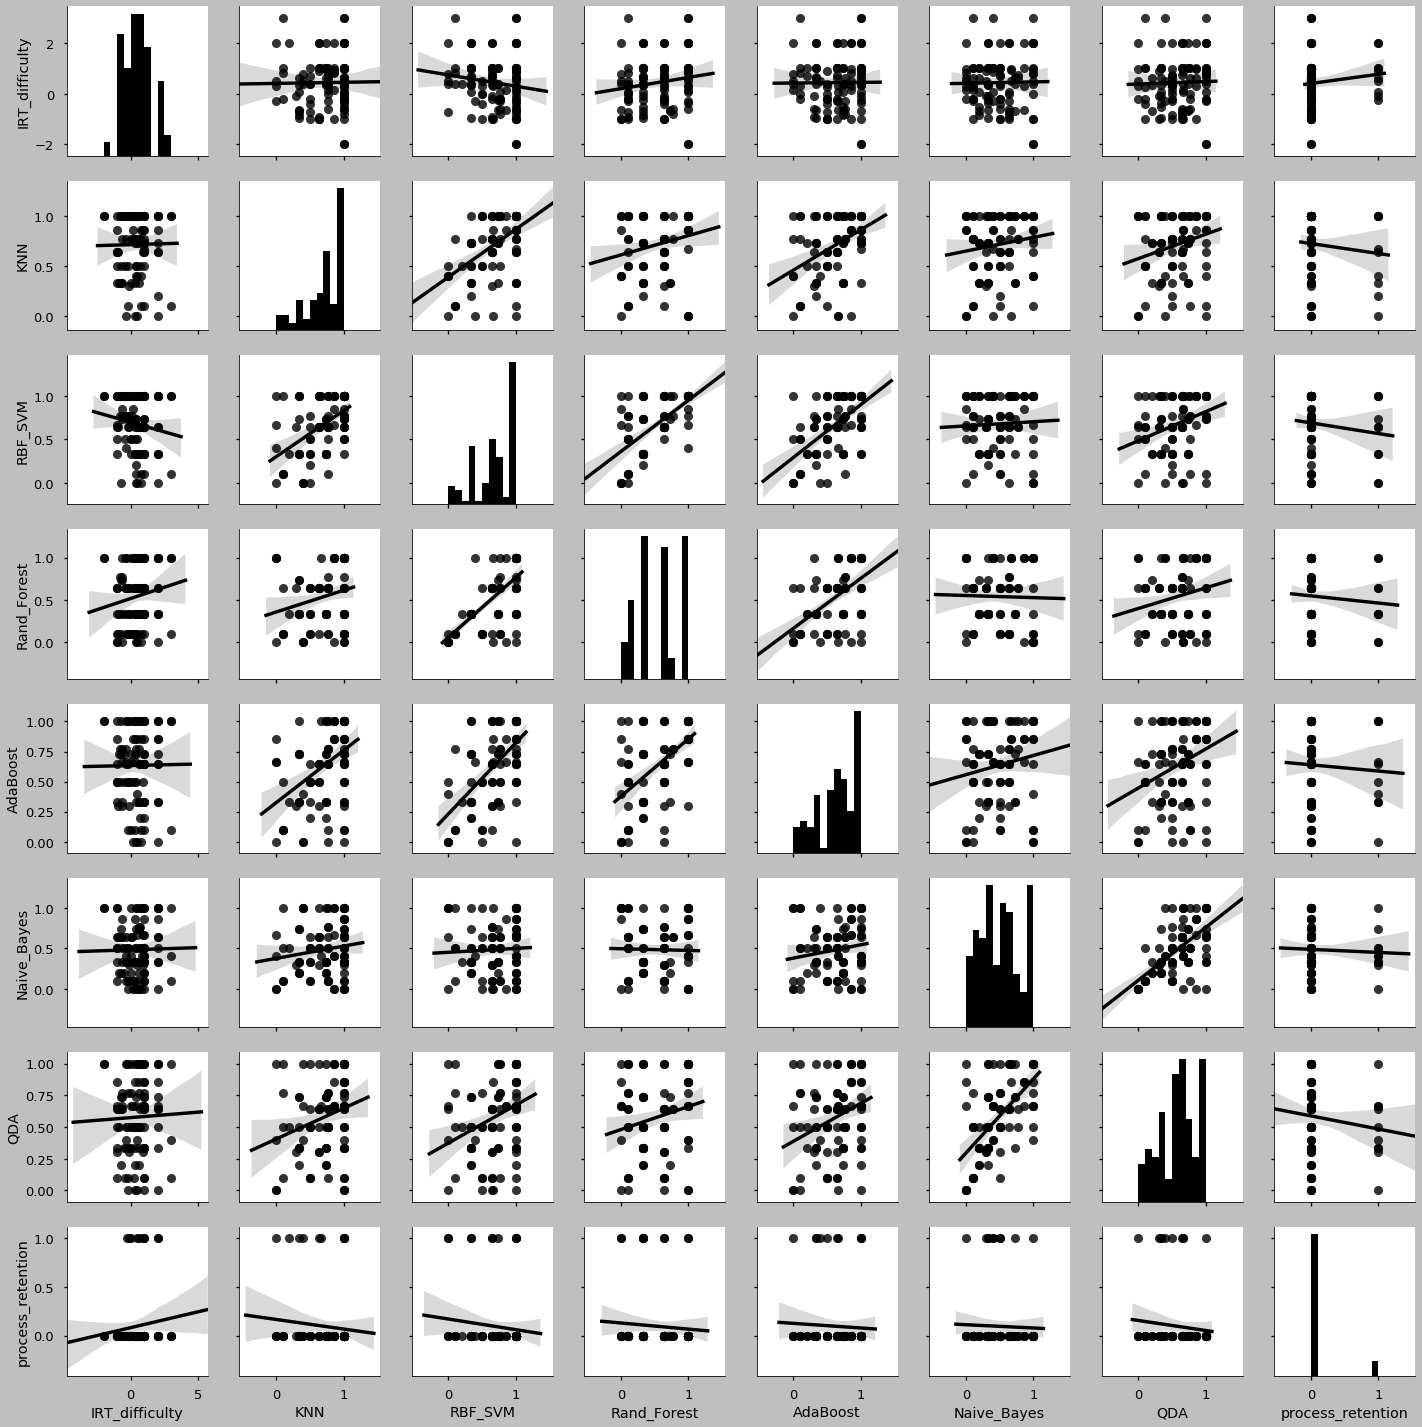

In [20]:
sns.pairplot(dat_heat.iloc[:,:-1], kind="reg")

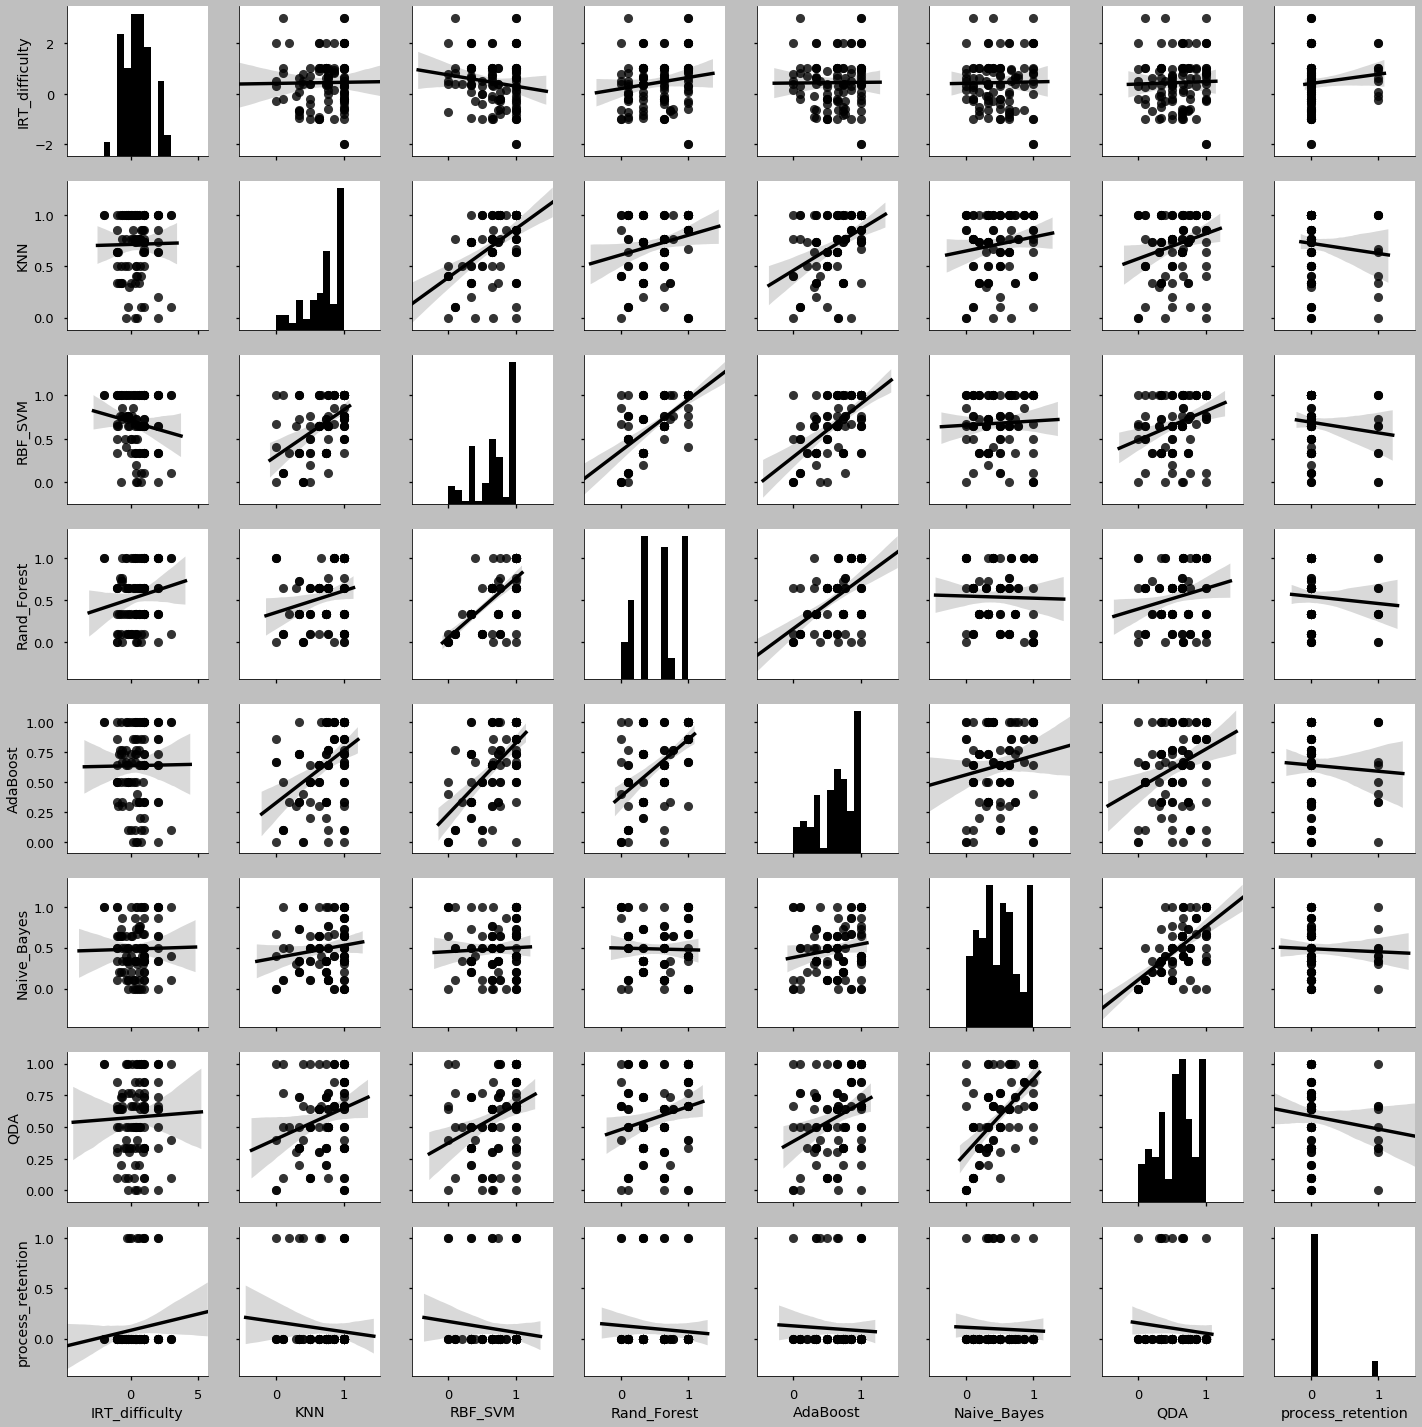

In [22]:
plt.style.use('seaborn-talk')
sns.pairplot(dat_heat.iloc[:,:-1], kind="reg")

In [25]:
%%R
dat=read.csv2("final reults.csv")
data=dat[!dat$Process=="undefined",]
colnames(data)
summary(data)

t.test(IRT_difficulty ~ Process, data=data))
t.test(KNN ~ Process, data=data)
t.test(RBF_SVM ~ Process, data=data)
t.test(Rand_Forest ~ Process, data=data)
t.test(AdaBoost ~ Process, data=data)
t.test(Naive_Bayes ~ Process, data=data)
t.test(QDA ~ Process, data=data)


cor.test(data$IRT_difficulty, data$KNN)
cor.test(data$IRT_difficulty, data$RBF_SVM)
cor.test(data$IRT_difficulty, data$Rand_Forest)
cor.test(data$IRT_difficulty, data$AdaBoost)
cor.test(data$IRT_difficulty, data$Naive_Bayes)
cor.test(data$IRT_difficulty, data$QDA)